# Licitacon:
## Análises Exploratórias, Identificação de Licitações Irregulares e Concorrência no Estado do RS

***
Esse notebook é de autoria de Antônio Teixeira Santana Neto e representa a resolução do teste técnico para o cargo de Cientista de Dados Jr na Data Science Brigade. 

As análises a seguir envolvem o tratamento dos dados de licitações e compras feitas pelos órgãos públicos do Estado do Rio Grande do Sul, no período de 2016 a 2019. Também será feito estudos exploratórios sobre possíveis licitações irregulares, quais itens foram mais comprados, assim como os órgãos que mais gastaram dinheiro público. Por fim, uma análise preliminar e simples será feita a respeito da concorrência das licitações no estado.

Comentários serão feitos explicando as linhas de código e suas funções.
***

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Importação e tratamento dos dados
## Dados de Licitações
***
As células abaixo tem como objetivo importar as planilhas (em formato .csv) das licitações do estado do Rio Grande do Sul, nos anos de 2016 a 2019. Após importação será escolhidas colunas para serem objeto de análises preliminares.
***

In [2]:
# a seguinte linha de código agrupa os nomes das planilhas contendo as informações sobre as licitações
licitacoes = ['licitacao_2016.csv','licitacao_2017.csv','licitacao_2018.csv','licitacao_2019.csv']

licitacao = pd.DataFrame(pd.read_csv(licitacoes[0]))

# esse for loop tem como objetivo ler cada arquivo como um tipo DataFrame e efetuar a concatenação,
#resultando em um único DataFrame

for licitacao_ano in licitacoes[1:]:
    data = pd.read_csv(licitacao_ano)
    licitacao = pd.concat([licitacao,data], axis=0,ignore_index=True)
    
licitacao.head() #imprime as 5 primeiras, e 5 últimas, linhas do df

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,84100,PM DE ESPERANÇA DO SUL,1.0,2016,CNV,12.0,2016.0,P,001,2016.0,...,NaN,NaN,J,6233397000148.0,6420.0,S,NaN,NaN,NaN,N
1,84100,PM DE ESPERANÇA DO SUL,4.0,2016,CNV,12.0,2016.0,P,003,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
2,82701,CM DE XANGRI-LÁ,1.0,2016,PRP,12.0,2016.0,G,01,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
3,84100,PM DE ESPERANÇA DO SUL,6.0,2016,CNV,12.0,2016.0,P,005,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
4,63900,PM DE COTIPORÃ,36.0,2016,PRD,NaN,NaN,NaN,344,2016.0,...,J,9255424000171.0,NaN,NaN,NaN,S,NaN,NaN,NaN,N


### Filtragem do dataframe licitacoes
***
A seguir, selecionaremos as seguintes colunas do df contendo todas as licitações, filtrando o TP_OBJETO por "COM" (compras):
***
**CD_ORGAO:** Código do órgão gerenciador da licitação.

**NM_ORGAO:** Nome do órgão gerenciador da licitação.

**NR_LICITACAO:** Número da Licitação ou Número da Adesão.

**ANO_LICITACAO:** Ano da licitação.

**VL_LICITACAO:** Valor total estimado para a licitação.

**TP_LICITACAO:** Tipo de licitação/Critério de julgamento.

**CD_TIPO_MODALIDADE:** Modalidade da Licitação ou Forma de Contratação.

**DS_OBJETO:** Descreve as principais informações relativas ao objeto licitatório.

**TP_OBJETO:** Tipo do objeto, aqui será utilizado o tipo "COM" == COMPRAS.

**DT_ABERTURA:** Data de Abertura da Licitação ou Data da Dispensa, Inexigibilidade ou Registro de Preço de Outro Órgão.

**DT_HOMOLOGACAO:** Data de Homologação. Data em que a licitação foi homologada.

In [3]:
# Essa célula efetua a seleção e filtragem dos dados do dataframe contendo as licitações

licitacao = licitacao[['CD_ORGAO','NM_ORGAO','NR_LICITACAO','ANO_LICITACAO','VL_LICITACAO','TP_LICITACAO',
           'CD_TIPO_MODALIDADE','DS_OBJETO','TP_OBJETO','DT_ABERTURA',
           'DT_HOMOLOGACAO']].query("TP_OBJETO=='COM'").reset_index(drop=True).drop(['TP_OBJETO'], axis=1)

print("Número de licitações no período entre 2016 e 2019: ", licitacao.shape[0])
licitacao.info()

Número de licitações no período entre 2016 e 2019:  82405
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82405 entries, 0 to 82404
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CD_ORGAO            82405 non-null  int64  
 1   NM_ORGAO            82405 non-null  object 
 2   NR_LICITACAO        82405 non-null  float64
 3   ANO_LICITACAO       82405 non-null  int64  
 4   VL_LICITACAO        76359 non-null  float64
 5   TP_LICITACAO        82405 non-null  object 
 6   CD_TIPO_MODALIDADE  82405 non-null  object 
 7   DS_OBJETO           82405 non-null  object 
 8   DT_ABERTURA         82405 non-null  object 
 9   DT_HOMOLOGACAO      60399 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 6.3+ MB


In [4]:
# Converte as colunas abaixo para o formato de data
licitacao['DT_ABERTURA']=pd.to_datetime(licitacao['DT_ABERTURA'], format='%Y-%m-%d',errors='coerce')
licitacao['DT_HOMOLOGACAO']=pd.to_datetime(licitacao['DT_HOMOLOGACAO'], format='%Y-%m-%d',errors='coerce')

# Tratamento das colunas do tipo string
licitacao = licitacao.astype({'CD_ORGAO': 'str', 'NR_LICITACAO': 'str', 'ANO_LICITACAO': 'str'})

## Dados de Itens
***
As células abaixo tem como objetivo importar as planilhas (em formato .csv) dos itens das licitações do estado do Rio Grande do Sul, nos anos de 2016 a 2019. Após importação será escolhidas colunas para serem objeto de análises preliminares.
***

In [5]:
# a seguinte linha de código agrupa os nomes das planilhas contendo as informações sobre os itens das licitações
itens = ['item_2016.csv','item_2017.csv','item_2018.csv','item_2019.csv']

item = pd.DataFrame(pd.read_csv(itens[0]))

# esse for loop tem como objetivo ler cada arquivo como um tipo DataFrame e efetuar a concatenação,
#resultando em um único DataFrame

for item_ano in itens[1:]:
    data = pd.read_csv(item_ano)
    item = pd.concat([item,data], axis=0,ignore_index=True)
    
item.head() #imprime as 5 primeiras, e 5 últimas, linhas do df

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
0,77200,15.0,2016,PRP,1,2,2,"Pneu 1000/20 liso radial, dianteiro, 16 lonas,...",10.0,UN,...,M,745.0,632.0,J,8774832000177.0,NaN,NaN,L,NaN,NaN
1,77200,15.0,2016,PRP,1,4,4,"Pneu 12.4x24 garra baixa, 10 lonas",4.0,UN,...,M,745.0,632.0,J,8774832000177.0,NaN,NaN,L,NaN,NaN
2,77200,15.0,2016,PRP,1,7,7,Pneu 1400x24 mínimo 12 lonas,6.0,UN,...,M,745.0,632.0,J,8774832000177.0,NaN,NaN,L,NaN,NaN
3,77200,15.0,2016,PRP,1,8,8,"Pneu 17.5x25 12 lonas, capacidade mínima de ca...",4.0,UN,...,M,745.0,632.0,J,8774832000177.0,NaN,NaN,L,NaN,NaN
4,77200,15.0,2016,PRP,1,12,12,"Pneu 18.4x30 garra baixa, mínimo 10 lonas",4.0,UN,...,M,745.0,632.0,J,8774832000177.0,NaN,NaN,L,NaN,NaN


### Filtragem do dataframe item
***
A seguir, selecionaremos as seguintes colunas do df contendo todos os itens das licitações:
***
**CD_ORGAO:** Código do órgão gerenciador da licitação.

**NR_LICITACAO:** Número da Licitação ou Número da Adesão.

**ANO_LICITACAO:** Ano da licitação.

**VL_TOTAL_ESTIMADO:** Valor total estimado (valor_unitario_estimado X quantidade).

**VL_TOTAL_HOMOLOGADO:** Valor total homologado (valor_unitario_homologado X quantidade).

**CD_TIPO_MODALIDADE:** Modalidade da Licitação ou Forma de Contratação.

**DS_ITEM:** Descreve o item licitado, ou seja, o item que o órgão público comprou.

In [6]:
# Essa célula efetua a seleção e filtragem dos dados do dataframe contendo as licitações

item = item[['CD_ORGAO','NR_LICITACAO','ANO_LICITACAO','VL_TOTAL_ESTIMADO',
           'VL_TOTAL_HOMOLOGADO','CD_TIPO_MODALIDADE','DS_ITEM']].reset_index(drop=True)

item = item.astype({'CD_ORGAO':'str','NR_LICITACAO':'str','ANO_LICITACAO':'str'})
item['VL_TOTAL_HOMOLOGADO'] = pd.to_numeric(item['VL_TOTAL_HOMOLOGADO'], errors='coerce')

print("Número de itens comprados no período entre 2016 e 2019: ", item.shape[0])
item.head()

Número de itens comprados no período entre 2016 e 2019:  3200756


,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,VL_TOTAL_ESTIMADO,VL_TOTAL_HOMOLOGADO,CD_TIPO_MODALIDADE,DS_ITEM
0,77200,15.0,2016,15000.0,14300.0,PRP,"Pneu 1000/20 liso radial, dianteiro, 16 lonas,..."
1,77200,15.0,2016,5040.0,5032.0,PRP,"Pneu 12.4x24 garra baixa, 10 lonas"
2,77200,15.0,2016,12000.0,11988.0,PRP,Pneu 1400x24 mínimo 12 lonas
3,77200,15.0,2016,12000.0,11912.0,PRP,"Pneu 17.5x25 12 lonas, capacidade mínima de ca..."
4,77200,15.0,2016,10400.0,10000.0,PRP,"Pneu 18.4x30 garra baixa, mínimo 10 lonas"


## Tratamento de Dados

In [7]:
print(item.VL_TOTAL_HOMOLOGADO.info())
licitacao.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3200756 entries, 0 to 3200755
Series name: VL_TOTAL_HOMOLOGADO
Non-Null Count    Dtype  
--------------    -----  
2556195 non-null  float64
dtypes: float64(1)
memory usage: 24.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82405 entries, 0 to 82404
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CD_ORGAO            82405 non-null  object        
 1   NM_ORGAO            82405 non-null  object        
 2   NR_LICITACAO        82405 non-null  object        
 3   ANO_LICITACAO       82405 non-null  object        
 4   VL_LICITACAO        76359 non-null  float64       
 5   TP_LICITACAO        82405 non-null  object        
 6   CD_TIPO_MODALIDADE  82405 non-null  object        
 7   DS_OBJETO           82405 non-null  object        
 8   DT_ABERTURA         82402 non-null  datetime64[ns]
 9   DT_HOMOLOGACAO      60399 non-null 

**Com essas informações iniciais, podemos levantar as seguintes observações:**
* Há 6046 licitações em que o valor não foi informado;
* 82405 licitações foram abertas, porém apenas **60399 foram homologadas, ou seja, 22006 ainda estão em disputa**;
* Dos 3200756 itens comprados, apenas **2556195 tem seus valores totais homologados**.

Vamos agrupar os dados das licitações, cujos valores estão faltantes, em um novo DataFrame, **licitacoes_valores_faltantes**, para posterior análise.

Vamos criar um novo dataframe contendo os dados sobre as licitações que foram homologadas e que possuem valor. Esse df será **licitacoes_homologadas**.

Por fim, vamos criar um novo dataframe contendo as informações sobre os itens comprados que possuem valor total de homologação não-nulo. Esse df será **compras_homologadas**

In [8]:
# cria um novo dataframe com os dados das licitações com valores faltantes.
licitacoes_valores_faltantes = licitacao.loc[licitacao.VL_LICITACAO.isna()].reset_index(drop=True)

# Cria um novo dataframe contendo os dados das licitações cujos processos foram homologadas.
licitacoes_homologadas = licitacao.loc[licitacao.DT_HOMOLOGACAO.notna()].reset_index(drop=True)

# Cria um novo dataframe contendo os dados das licitações cujos processos foram homologadas, e possuem valor estipulado.
licitacoes_homologadas_completo = licitacoes_homologadas.loc[licitacoes_homologadas.VL_LICITACAO.notna()].reset_index(drop=True)

# Cria um dataframe contendo as compras cujos valores totais foram homologados
compras_homologadas = item.loc[item.VL_TOTAL_HOMOLOGADO.notna()].reset_index(drop=True)

print("Número de licitações homologadas: ",licitacoes_homologadas_completo.shape[0])

Número de licitações homologadas:  56232


In [9]:
licitacoes_homologadas_completo.describe()

,VL_LICITACAO
count,5.623200e+04
mean,1.544644e+06
std,2.052491e+08
min,0.000000e+00
25%,1.015295e+04
50%,3.770000e+04
75%,1.370000e+05
max,4.598750e+10


In [10]:
compras_homologadas.describe()

,VL_TOTAL_ESTIMADO,VL_TOTAL_HOMOLOGADO
count,2.536580e+06,2.556195e+06
mean,1.009701e+06,2.124564e+04
std,1.220432e+09,1.277584e+06
min,-1.593000e+03,-1.932000e+04
25%,1.190000e+02,1.023400e+02
50%,6.510000e+02,5.335000e+02
75%,3.400000e+03,2.742550e+03
max,1.879982e+12,9.900000e+08


***
A partir do método .describe(), aplicado aos dataframes acima, percebe-se a presença de licitações de compras com **VL_TOTAL_ESTIMADO e VL_TOTAL_HOMOLOGADO negativos**. Além disso, há valores que estão muito acima da média nesses dataframes. 

É sabido que existem diversas modalidades de licitações. Então, antes de prosseguir com nossas análises, vamos verificar quais possuem os maiores valores (em R$). Esse estudo será feito com a aplicação do método **groupby** dos dataframes, agrupando pela coluna **CD_TIPO_MODALIDADE**, e tomando a soma total.
***

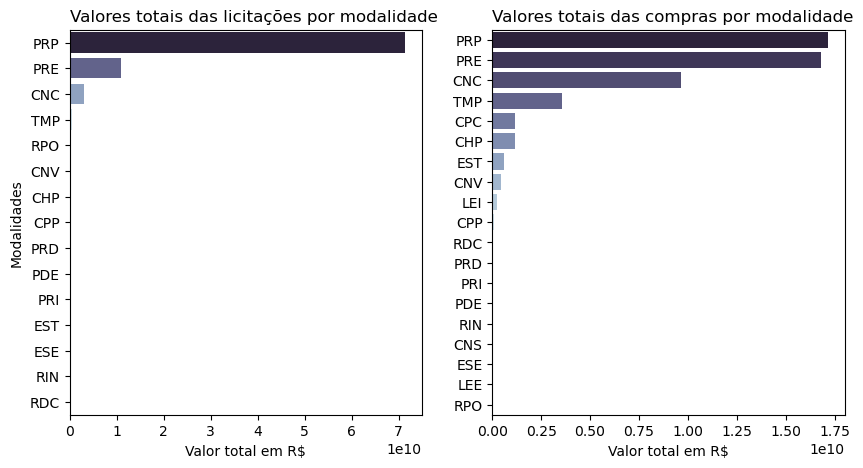

In [11]:
# Aplicação do método groupby para agrupar os diferentes tipos de modalidade,
# retornando a soma total dos valores (em R$).
licitacoes_modalidades = licitacoes_homologadas_completo.groupby(by='CD_TIPO_MODALIDADE').sum().sort_values(
                                                                                    by='VL_LICITACAO',ascending=False)

# Filtra o df compras_homologadas pelas colunas de valores, retornando apenas números positivos.
compras_modalidades = compras_homologadas.query("VL_TOTAL_ESTIMADO >= 0 and VL_TOTAL_HOMOLOGADO>=0")
compras_modalidades = compras_modalidades.groupby(by='CD_TIPO_MODALIDADE').sum().sort_values(
                                                                                    by='VL_TOTAL_HOMOLOGADO',ascending=False)

################################################### PLOTANDO GRÁFICO ###################################################

# define paleta de cores
palette = sns.color_palette("ch:s=.25,rot=-.25",n_colors=4)
palette.reverse()

# Criando o subplot
fig=plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.barplot(data=licitacoes_modalidades,y=licitacoes_modalidades.index,x='VL_LICITACAO', orient='h', palette=palette)
plt.title("Valores totais das licitações por modalidade", loc='left', size=12)
plt.ylabel("Modalidades")
plt.xlabel("Valor total em R$")

# define paleta de cores
palette = sns.color_palette("ch:s=.25,rot=-.25",n_colors=10)
palette.reverse()

plt.subplot(1, 2, 2)
sns.barplot(data=compras_modalidades,y=compras_modalidades.index,x='VL_TOTAL_HOMOLOGADO', orient='h', palette=palette)
plt.title("Valores totais das compras por modalidade", loc='left',size=12)
plt.ylabel(" ")
plt.xlabel("Valor total em R$")
plt.show()

***
A partir dos gráficos acima é possível afirmar que as três categorias que correspondem à maior parte do dinheiro público gasto são:
* **PRE:** Pregão Eletrônico
* **PRP:** Pregão Presencial
* **CNC:** Concorrência

A partir daqui, consideraremos apenas duas das modalidades de licitações: **PRP e PRE**.

Essa escolha se deve ao fato delas serem as principais modalidades de licitações, como observado. Além disso, **representam compras mais recorrentes**, enquanto que concorrência representa licitações que envolvam obras públicas, por exemplo.

Adicionalmente, analisaremos as distribuições das licitações e compras homologadas, durante o período de 2016 a 2019.
Vamos comparar os valores totais das licitações nesse período, asssim como os valores totais dos itens comprados, a fim de encontrar novos insights.
***

In [12]:
# As linhas de código abaixo tem como objetivo filtrar os df pelas modalidades PRP e PRE. Após isso, os novos dataframes
# serão agrupados pela coluna ANO_LICITACAO, tomando os as somas totais das licitações por ano.

licitacoes_homologadas_pregoes = licitacoes_homologadas_completo.query("(CD_TIPO_MODALIDADE=='PRP' or CD_TIPO_MODALIDADE=='PRE') and VL_LICITACAO>=0").reset_index(drop=True)
licitacoes_anuais = licitacoes_homologadas_pregoes.groupby(by="ANO_LICITACAO").sum()

compras_homologadas_pregoes= compras_homologadas.query(
                "(CD_TIPO_MODALIDADE == 'PRP' or CD_TIPO_MODALIDADE=='PRE') and VL_TOTAL_HOMOLOGADO>=0").reset_index(drop=True)
compras_anuais = compras_homologadas_pregoes[['ANO_LICITACAO','VL_TOTAL_HOMOLOGADO']].groupby(by="ANO_LICITACAO").sum()


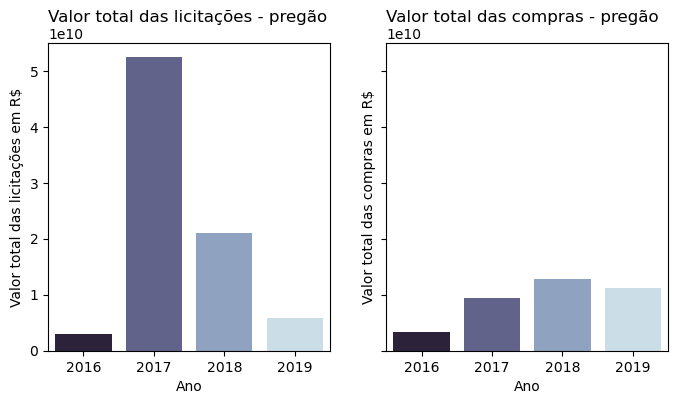

In [13]:
# define paleta de cores
palette = sns.color_palette("ch:s=.25,rot=-.25",n_colors=4)
palette.reverse()

# Criando o subplot
fig=plt.figure(figsize=(8,4))
ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=licitacoes_anuais, x=licitacoes_anuais.index,y='VL_LICITACAO',palette=palette)
plt.title('Valor total das licitações - pregão',pad=15,loc='left')
plt.ylabel('Valor total das licitações em R$')
plt.xlabel('Ano')
plt.grid(visible=False)

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
sns.barplot(data=compras_anuais, x=compras_anuais.index,y='VL_TOTAL_HOMOLOGADO',palette=palette)
#sns.regplot(x=np.arange(0,len(compras_anuais)), y=compras_anuais.VL_TOTAL_HOMOLOGADO, ax=ax2)
plt.title('Valor total das compras - pregão',pad=15,loc='left')
plt.xlabel('Ano')
plt.ylabel('Valor total das compras em R$')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.grid(visible=False)
plt.show()

### *Outliers*
***
A partir da análise dos gráficos e dos dados estatísticos (provenientes do método *.describe*), nota-se que o valor total das licitações, homologadas e nas modalidades do tipo pregões, é **menor no ano de 2016, tem um pico em 2017, e decresce nos anos seguintes**. Todavia, o mesmo comportamento é observado de forma semelhante no gráfico da direita, referente às compras. Porém, o ano de 2017 ilustra uma exceção, **indicando a presença de outliers.**

Com isso em mente, as células a seguir representam o procedimento para gerar os **boxplots** dos valores das licitações no período estudado, assim como o tratamento dessas amostras atípicas e que fogem muito da média. Para reforçar nossa análise, recorreremos aos gráficos de boxplot dos dataframes **licitacoes_homologadas_pregoes e compras_homologadas_pregoes**
***

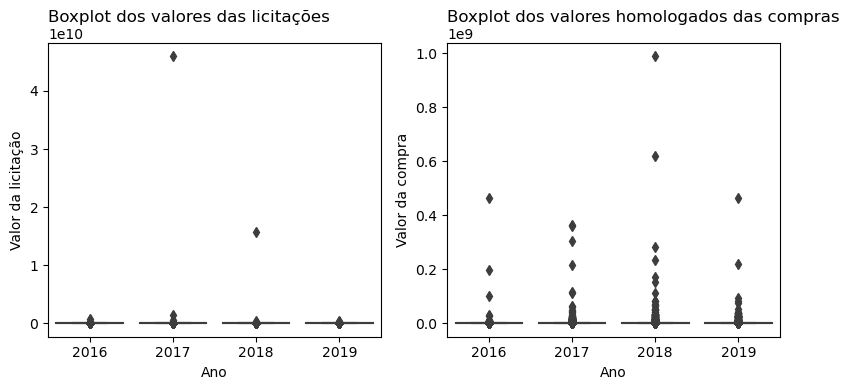

In [14]:
####################################### PLOTANDO BOXPLOT DOS DATAFRAMES #######################################

# Criando o subplot
fig=plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.boxplot(data=licitacoes_homologadas_pregoes, x='ANO_LICITACAO',y='VL_LICITACAO')
plt.title('Boxplot dos valores das licitações',pad=15,loc='left')
plt.ylabel('Valor da licitação')
plt.xlabel('Ano')

plt.subplot(1, 2, 2)
sns.boxplot(data=compras_homologadas_pregoes, x='ANO_LICITACAO',y='VL_TOTAL_HOMOLOGADO')
plt.xlabel('Ano')
plt.ylabel('Valor da compra')
plt.title('Boxplot dos valores homologados das compras',pad=15, loc='left')
plt.tight_layout()
plt.show()

***
O tratamento de *outliers* pode ser feito por meio de vários métodos, dois deles são:

* Método Interquartile range (IQR)
* Z-Score

A seguir utilizaremos o **Método IQR**, o qual define outliers como pontos de dados que estão fora do intervalo do primeiro quartil (percentil 25) e do terceiro quartil (percentil 75).
***

In [15]:
# Tratamento dos dados de licitações
Q1 = licitacoes_homologadas_pregoes['VL_LICITACAO'].quantile(0.25)
Q3 = licitacoes_homologadas_pregoes['VL_LICITACAO'].quantile(0.75)

IQR = Q3 - Q1
lower_bound_licitacao = Q1 - 1.5 * IQR
upper_bound_licitacao = Q3 + 1.5 * IQR
outliers_licitacao = (licitacoes_homologadas_pregoes['VL_LICITACAO'] < lower_bound_licitacao) | (licitacoes_homologadas_pregoes['VL_LICITACAO'] > upper_bound_licitacao)

# Tratamento dos dados de compras
Q1 = compras_homologadas_pregoes['VL_TOTAL_HOMOLOGADO'].quantile(0.25)
Q3 = compras_homologadas_pregoes['VL_TOTAL_HOMOLOGADO'].quantile(0.75)

IQR = Q3 - Q1
lower_bound_compras = Q1 - 1.5 * IQR
upper_bound_compras = Q3 + 1.5 * IQR
outliers_compras = (compras_homologadas_pregoes['VL_TOTAL_HOMOLOGADO'] < lower_bound_compras) | (compras_homologadas_pregoes['VL_TOTAL_HOMOLOGADO'] > upper_bound_compras)

Número de licitações removidas:  5267

Número de compras removidas:  256153


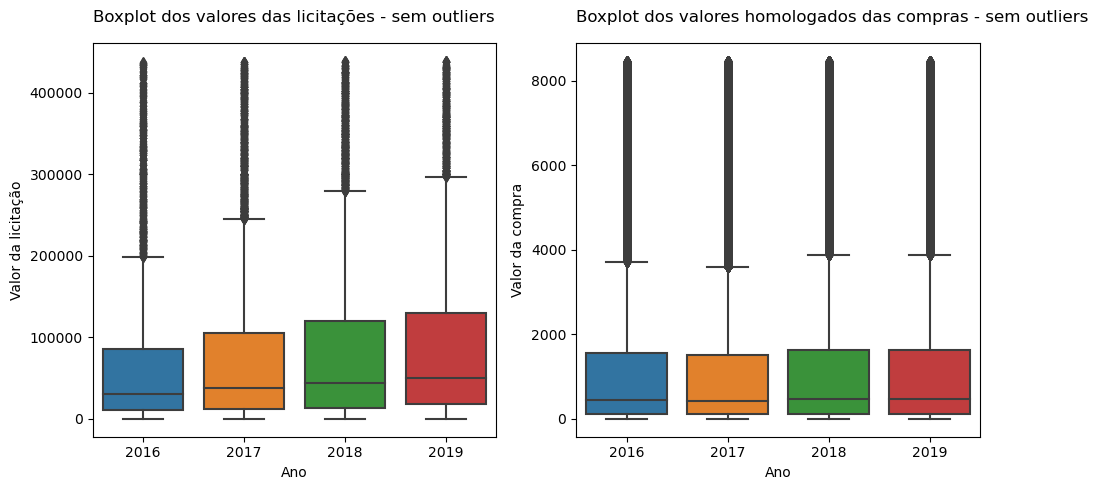

In [16]:
# Seleciona as linhas que não possuem valores atípicos
licitacoes_sem_outliers = licitacoes_homologadas_pregoes[~pd.DataFrame(outliers_licitacao).any(axis=1)]
print("Número de licitações removidas: ", licitacoes_homologadas_pregoes.shape[0] - licitacoes_sem_outliers.shape[0])

compras_sem_outliers = compras_homologadas_pregoes[~pd.DataFrame(outliers_compras).any(axis=1)]
print("\nNúmero de compras removidas: ", compras_homologadas_pregoes.shape[0] - compras_sem_outliers.shape[0])

################################################### PLOTANDO GRÁFICO ###################################################

# Criando o subplot
fig=plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=licitacoes_sem_outliers, x='ANO_LICITACAO',y='VL_LICITACAO')
plt.title('Boxplot dos valores das licitações - sem outliers',pad=15, loc='left')
plt.ylabel('Valor da licitação')
plt.xlabel('Ano')

plt.subplot(1, 2, 2)
sns.boxplot(data=compras_sem_outliers, x='ANO_LICITACAO',y='VL_TOTAL_HOMOLOGADO')
plt.xlabel('Ano')
plt.ylabel('Valor da compra')
plt.title('Boxplot dos valores homologados das compras - sem outliers',pad=15, loc='left')
plt.tight_layout()
plt.show()

### Análise dos *Outliers*
***
Restam agora apenas **35416 licitações**, ou seja, aquelas que abrangem as modalidades PRP e PRE, e que não possuem muitos valores atípicos. Dentre as compras, restam **1431711 válidas**, isto é, que abrangem as mesmas modalidades, possuem valores homologados positivos, e sem muitos valores atípicos.

Após tratamento inicial dos outliers, por meio do Método IQR, percebe-se que ainda há presença de várias amostras com valores atípicos. Sendo mais preciso, **há 5267 amostras de licitação e 256153 compras com valores atípicos.**

Vamos, então, mergulhar nessas amostras, e analisar se entre elas também há outliers. Para isso, os métodos e ferramentas aplicadas anteriormente serão repetidas a seguir.
***

In [17]:
licitacoes_com_outliers = licitacoes_homologadas_pregoes[pd.DataFrame(outliers_licitacao).any(axis=1)]
print("Número de licitações com outliers: ", licitacoes_com_outliers.shape[0])

compras_com_outliers = compras_homologadas_pregoes[pd.DataFrame(outliers_compras).any(axis=1)]
print("\nNúmero de licitações com outliers: ", compras_com_outliers.shape[0])

licitacao_descritivo_outliers = licitacoes_com_outliers.describe()

compras_descritivo_outliers = compras_com_outliers.describe()

# DataFrame que contém todos os dados descritivos dos dataframes referentes aos ourliers. 
#Tanto para licitações quanto compras
descritivo = pd.concat([licitacao_descritivo_outliers,compras_descritivo_outliers], axis=1)
descritivo 

Número de licitações com outliers:  5267

Número de licitações com outliers:  256153


,VL_LICITACAO,VL_TOTAL_ESTIMADO,VL_TOTAL_HOMOLOGADO
count,5.267000e+03,2.518010e+05,2.561530e+05
mean,1.508978e+07,4.767413e+05,1.369012e+05
std,6.700568e+08,6.122621e+07,3.278603e+06
min,4.399998e+05,0.000000e+00,8.475500e+03
25%,6.153559e+05,1.407000e+04,1.348500e+04
50%,9.409153e+05,2.748000e+04,2.402200e+04
75%,1.788450e+06,6.840000e+04,5.820000e+04
max,4.598750e+10,2.171000e+10,9.900000e+08


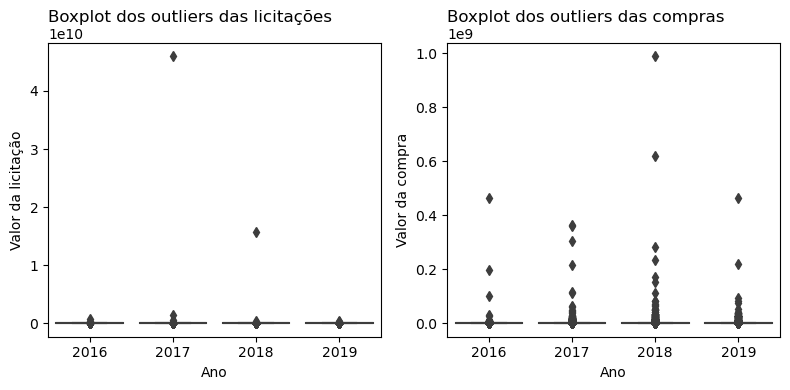

In [18]:
####################################### PLOTANDO BOXPLOT DOS OUTLIERS #######################################

# Criando o subplot
fig=plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.boxplot(data=licitacoes_com_outliers, x='ANO_LICITACAO',y='VL_LICITACAO')
plt.title('Boxplot dos outliers das licitações',pad=15, loc='left')
plt.ylabel('Valor da licitação')
plt.xlabel('Ano')

plt.subplot(1, 2, 2)
sns.boxplot(data=compras_com_outliers, x='ANO_LICITACAO',y='VL_TOTAL_HOMOLOGADO')
plt.xlabel('Ano')
plt.ylabel('Valor da compra')
plt.title('Boxplot dos outliers das compras',pad=15, loc='left')
plt.tight_layout()
plt.show()

In [19]:
################################################# TRATAMENTO DOS OUTLIERS #################################################

# Tratamento dos dados de licitações
Q1 = licitacoes_com_outliers['VL_LICITACAO'].quantile(0.25)
Q3 = licitacoes_com_outliers['VL_LICITACAO'].quantile(0.75)
median = licitacoes_com_outliers['VL_LICITACAO'].median()

IQR = Q3 - Q1
lower_bound_licitacao = Q1 - 1.5 * IQR
upper_bound_licitacao = Q3 + 1.5 * IQR
outliers_licitacao = (licitacoes_com_outliers['VL_LICITACAO'] < lower_bound_licitacao) | (licitacoes_com_outliers['VL_LICITACAO'] > upper_bound_licitacao)


# Tratamento dos dados de compras
Q1 = compras_com_outliers['VL_TOTAL_HOMOLOGADO'].quantile(0.25)
Q3 = compras_com_outliers['VL_TOTAL_HOMOLOGADO'].quantile(0.75)
median = compras_com_outliers['VL_TOTAL_HOMOLOGADO'].median()

IQR = Q3 - Q1
lower_bound_compras = Q1 - 1.5 * IQR
upper_bound_compras = Q3 + 1.5 * IQR
outliers_compras = (compras_com_outliers['VL_TOTAL_HOMOLOGADO'] < lower_bound_compras) | (compras_com_outliers['VL_TOTAL_HOMOLOGADO'] > upper_bound_compras)


Número de licitações removidas:  554

Número de compras removidas:  31345


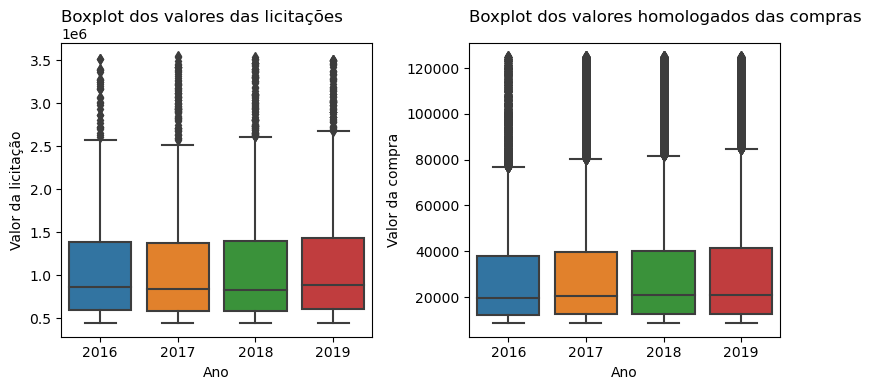

In [20]:
outliers_licitacoes_sem_outliers = licitacoes_com_outliers[~pd.DataFrame(outliers_licitacao).any(axis=1)]
print("Número de licitações removidas: ", licitacoes_com_outliers.shape[0] - outliers_licitacoes_sem_outliers.shape[0])

outliers_compras_sem_outliers = compras_com_outliers[~pd.DataFrame(outliers_compras).any(axis=1)]
print("\nNúmero de compras removidas: ", compras_com_outliers.shape[0] - outliers_compras_sem_outliers.shape[0])


# Criando o subplot
fig=plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.boxplot(data=outliers_licitacoes_sem_outliers, x='ANO_LICITACAO',y='VL_LICITACAO')
plt.title('Boxplot dos valores das licitações',pad=15, loc='left')
plt.ylabel('Valor da licitação')
plt.xlabel('Ano')

plt.subplot(1, 2, 2)
sns.boxplot(data=outliers_compras_sem_outliers, x='ANO_LICITACAO',y='VL_TOTAL_HOMOLOGADO')
plt.xlabel('Ano')
plt.ylabel('Valor da compra')
plt.title('Boxplot dos valores homologados das compras',pad=15, loc='left')
plt.tight_layout()
plt.show()

In [21]:
licitacoes_com_outliers = licitacoes_com_outliers[pd.DataFrame(outliers_licitacao).any(axis=1)]
print("Número de licitações com outliers: ", licitacoes_com_outliers.shape[0])

compras_com_outliers = compras_com_outliers[pd.DataFrame(outliers_compras).any(axis=1)]
print("\nNúmero de licitações com outliers: ", compras_com_outliers.shape[0])

licitacao_descritivo_outliers = licitacoes_com_outliers.describe()

compras_descritivo_outliers = compras_com_outliers.describe()

# DataFrame que contém todos os dados descritivos dos dataframes referentes aos ourliers. 
#Tanto para licitações quanto compras
descritivo = pd.concat([licitacao_descritivo_outliers,compras_descritivo_outliers], axis=1)
descritivo 

Número de licitações com outliers:  554

Número de licitações com outliers:  31345


,VL_LICITACAO,VL_TOTAL_ESTIMADO,VL_TOTAL_HOMOLOGADO
count,5.540000e+02,3.037400e+04,3.134500e+04
mean,1.339576e+08,3.233338e+06,8.964061e+05
std,2.063879e+09,1.730734e+08,9.337224e+06
min,3.551906e+06,0.000000e+00,1.252728e+05
25%,4.544199e+06,1.766056e+05,1.701720e+05
50%,6.728724e+06,2.792590e+05,2.520210e+05
75%,1.231841e+07,5.418294e+05,4.749000e+05
max,4.598750e+10,2.171000e+10,9.900000e+08


### Em busca de licitações irregulares
***
Após essa análise, percebe-se que ainda há presença de outliers nos conjuntos de valores atípicos. 

Para o conjunto de dados referente às licitações, o **terceiro quartil é igual a 1,23e+07**, ao passo que o valor máximo é 1000x maior.

Para os dados de compras homologadas, por sua vez, o valor máximo registrado também é cerca de **1000x maior que o seu terceiro quartil.**

Com isso em mãos, uma análise empírica de parte desses dados de licitações pode levantar ideias sobre esse comportamento. Dessa forma, vamos selecionar aquelas licitações cujos valores estão acima do terceiro quartil. Após isso, com os dados de compras em mãos, filtraremos pelo **CD_ORGAO, NR_LICITACAO e ANO_LICITACAO**, a fim de encontrar quais foram os itens comprados.
***

In [22]:
# Essa célula seleciona as licitações com valores acima de 1.231841e+07
licitacoes_atipicas = licitacoes_com_outliers[['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'VL_LICITACAO','DS_OBJETO']].query("VL_LICITACAO > 1.231841e+07")
licitacoes_atipicas.sort_values(by='VL_LICITACAO', ascending= False).head()

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,VL_LICITACAO,DS_OBJETO
17293,78700,PM DE PASSO DO SOBRADO,14.0,2017,4.598750e+10,Contratação para o fornecimento de combustívei...
28414,88044,PM DE SANTA MARGARIDA DO SUL,4.0,2018,1.569896e+10,AQUISICAO DE MEDICAMENTOS ESPECIAIS E PARA FAR...
18011,88347,CONS. PÚBL. DA ASSOC. DOS MUNIC. DA REGIÃO MET...,12.0,2017,1.443952e+09,AQUISIÇÃO DE ACERVO BIBLIOGRÁFICO
6281,72600,PM DE TUPANDI,7.0,2016,7.915486e+08,Combustível para veículos da Prefeitura Munici...
7228,47000,PM DE HERVAL,3.0,2017,4.958380e+08,Registro de Preços de Medicamentos


In [23]:
# Analisando a primeira linha do df acima:
compras_1 = compras_homologadas_pregoes.query("CD_ORGAO=='78700' and NR_LICITACAO=='14.0' and ANO_LICITACAO=='2017'")
compras_1

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,VL_TOTAL_ESTIMADO,VL_TOTAL_HOMOLOGADO,CD_TIPO_MODALIDADE,DS_ITEM
433357,78700,14.0,2017,7.965000e+09,181867.5,PRP,GASOLINA COMUM
433358,78700,14.0,2017,1.631250e+10,224025.0,PRP,OLEO DIESEL S-10
433359,78700,14.0,2017,2.171000e+10,260520.0,PRP,ÓLEO DIESEL BS 500


In [24]:
# Analisando a segunda linha do df acima:
compras_2 = compras_homologadas_pregoes.query("CD_ORGAO=='88044' and NR_LICITACAO=='4.0' and ANO_LICITACAO=='2018'")
print("Número de compras homologadas: ", compras_2.shape[0])
compras_2.head()

Número de compras homologadas:  272


,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,VL_TOTAL_ESTIMADO,VL_TOTAL_HOMOLOGADO,CD_TIPO_MODALIDADE,DS_ITEM
767290,88044,4.0,2018,168456000.0,59200.0,PRP,SULFATO DE SALBUTAMOL AEROSSOL ORAL 100MG/DOSE
767291,88044,4.0,2018,90880.0,77768.0,PRP,SERETIDE 25/125MG 120 DOSES
767292,88044,4.0,2018,32160000.0,6700.0,PRP,BISSULFATO DE CLOPIDOGREL DE 75 MG
767293,88044,4.0,2018,5953.5,5854.5,PRP,AVAMYS SPRAY NASAL 120 DOSES
767294,88044,4.0,2018,140100000.0,56000.0,PRP,AMOXICILINA 500MG + CLAVULANATO DE POTASSIO 125MG


In [25]:
print("Comparativo entre o valor total estimado e o homologado para a licitação de número 14\nda Prefeitura Municipal de Passo do Sobrado para fornecimento de combustível.")
print(compras_1[['VL_TOTAL_ESTIMADO','VL_TOTAL_HOMOLOGADO']].agg(['sum']).to_string())

print("\nComparativo entre o total estimado e o homologado, para a licitação de número 4\nda Prefeitura Municipal de Santa Margarida do Sul para aquisição de Medicamentos Especiais e para Farmácia Básica")
print(compras_2[['VL_TOTAL_ESTIMADO','VL_TOTAL_HOMOLOGADO']].agg(['sum']).to_string())

Comparativo entre o valor total estimado e o homologado para a licitação de número 14
da Prefeitura Municipal de Passo do Sobrado para fornecimento de combustível.
     VL_TOTAL_ESTIMADO  VL_TOTAL_HOMOLOGADO
sum       4.598750e+10             666412.5

Comparativo entre o total estimado e o homologado, para a licitação de número 4
da Prefeitura Municipal de Santa Margarida do Sul para aquisição de Medicamentos Especiais e para Farmácia Básica
     VL_TOTAL_ESTIMADO  VL_TOTAL_HOMOLOGADO
sum       1.409316e+10           7270766.88


### Discussão
***
A partir das análises acima, percebemos que há muitas licitações cujos valores estão muito acima da média amostral. Esse mesmo comportamento também ocorre para os valores homologados das compras. Devido a isso, o tratamento desses *outliers* foi feito para garantir uma melhor análise.

Apesar do tratamento aplicado, ainda se fez presente amostras atípicas nos dados. Investigando essas amostras, empiricamente, notou-se a presença de licitações com valores muito acima do normal. Esse é o caso de uma **licitação para aquisição de combustíveis da Prefeitura Municipal de Passo do Sobrado, município com uma população de pouco mais de 6400 habitantes**. A licitação em questão possui valor de cerca de **45 bilhões de reais**, o qual é extremamente elevado para o conjunto de dados. Todavia, o valor homologado que foi gasto com as compras equivale a cerca de **666,4 mil de reais**. 

Dessa forma, uma análise mais precisa e complexa deve-se feita para encontrar outras discrepâncias ou possíveis fraudes em licitações.
***

# Análise Exploratória
## Principais materiais comprados
***
Vamos, agora, responder a seguinte pergunta: Quais os principais bens materiais comprados?

Para isso, vamos prosseguir nossas análises com os dataframes tratados, isto é, os dados obtidos após a remoção dos outliers. Ainda serão consideradas as licitações cujas modalidades são PRP e PRE. Ademais, serão tomadas apenas as licitações com valores positivos.

***

In [26]:
# Cria um dataframe contendo os itens mais recorrentes.
itens_mais_comprados = pd.DataFrame(compras_sem_outliers['DS_ITEM'].value_counts()).reset_index().rename(
                                                                        columns={'index':'Descricao','DS_ITEM':'Frequencia'})
itens_mais_comprados.head(10)

,Descricao,Frequencia
0,"MANGUEIRA SILICONE 2.1/2""",1861
1,MATERIAL,1460
2,.,1375
3,Adesivo fotopolimerizável primer e adesivo em ...,422
4,FILTRO,381
5,CENOURA,332
6,CEBOLA,317
7,ALHO,315
8,BATATA INGLESA,282
9,PARAFUSO,269


### 10 Itens mais Comprados

A partir do dataframe, **itens_mais_comprados**, acima, observa-se que a categoria **"MANGUEIRA SILICONE 2.1/2""** foi comprada mais de **1861 vezes**, no período de 2016 a 2019. **"MATERIAL"** também está entre os objetos de licitações. Outros gastos relevantes são: parafusos; filtros; adesivoss fotopolimeráveis, além de compras de itens alimentícios.

Vale ressaltar, entretanto, que há um grande número de licitações cujas descrições do objeto licitado estão **faltantes**, ".". Essas compras são recorrentes em 1375 licitações, podendo ser alvo de futuros estudos e análises.

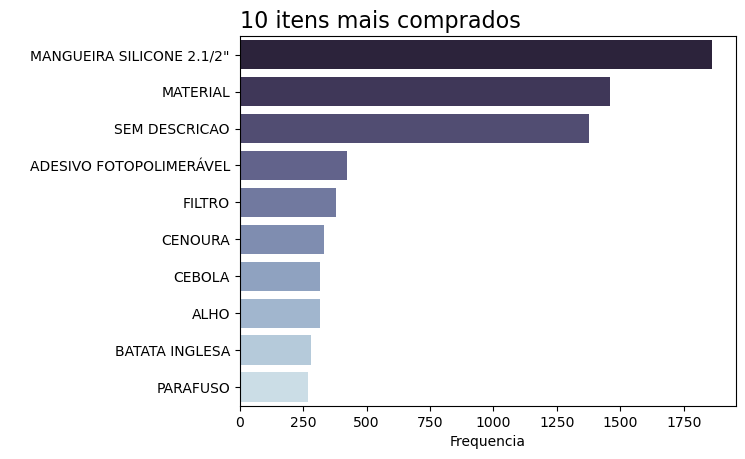

In [27]:
dezitens_mais_comprados = itens_mais_comprados.head(10).copy()
dezitens_mais_comprados['Descricao'].loc[[2,3]] = ['SEM DESCRICAO','ADESIVO FOTOPOLIMERÁVEL'] # essa linha de código troca o DS_ITEM "." por "SEM DESCRICAO"

# define paleta de cores
palette = sns.color_palette("ch:s=.25,rot=-.25",n_colors=10)
palette.reverse()

# Criar gráfico de barras
sns.barplot(data=dezitens_mais_comprados,y='Descricao',x='Frequencia', orient='h',palette=palette)
plt.title("10 itens mais comprados", loc='left', size=16)
plt.ylabel(" ")
plt.show()

### Comparativo das compras totais

***
Vamos analisar qual a fração que esses 10 itens mais relevantes tem de todas as compras. Além disso, percebe-se que há compras que foram realizadas uma única vez. Dessa forma, também iremos comparar a fração desses itens em relação ao todo.

***

In [28]:
# A linha de código abaixo realiza a soma dos 10 itens mais comprados.
soma = compras_sem_outliers.groupby(by='DS_ITEM').sum().loc[itens_mais_comprados.head(10).Descricao.values].agg(['sum'])
print("Valor total homologado dos 10 itens mais comprados (em R$): ",  soma.VL_TOTAL_HOMOLOGADO.iloc[0])


# A linha de código abaixo realiza a soma dos outros itens restantes, que foram comprados.
restante = compras_sem_outliers.groupby(by='DS_ITEM').sum().drop(labels=itens_mais_comprados.head(10).Descricao.values).agg(['sum'])
print("\nValor total homologado do restante dos itens comprados (em R$): ",  restante.VL_TOTAL_HOMOLOGADO.iloc[0])

Valor total homologado dos 10 itens mais comprados (em R$):  6107947.569999999

Valor total homologado do restante dos itens comprados (em R$):  1780725404.2399998


In [29]:
# Essa célula calcula os itens que possuem uma frequência igual a 1,
# e compara com o total homologado por todas as outras compras.

itens_comprados_1vez = itens_mais_comprados.query("Frequencia<=1").copy()


# A linha de código abaixo realiza a soma dos itens comprados semanalmente, ao longo do período de 2016 a 2019.
soma_compraunica = compras_sem_outliers.groupby(by='DS_ITEM').sum().loc[itens_comprados_1vez.Descricao.values].agg(['sum'])
print("Valor total homologado dos itens com compra única (em R$): ",  soma_compraunica.VL_TOTAL_HOMOLOGADO.iloc[0])


# A linha de código abaixo realiza a soma dos outros itens restantes, que foram comprados.
restante_unitario = compras_sem_outliers.groupby(by='DS_ITEM').sum().drop(labels=itens_comprados_1vez.Descricao.values).agg(['sum'])
print("\nValor total homologado do restante dos itens comprados (em R$): ",  restante_unitario.VL_TOTAL_HOMOLOGADO.iloc[0])

Valor total homologado dos itens com compra única (em R$):  908194935.1700001

Valor total homologado do restante dos itens comprados (em R$):  878638416.6399999


Quantidade total dos 10 itens mais recorrentes:  7014

Quantidade total de compras unitárias:  688110


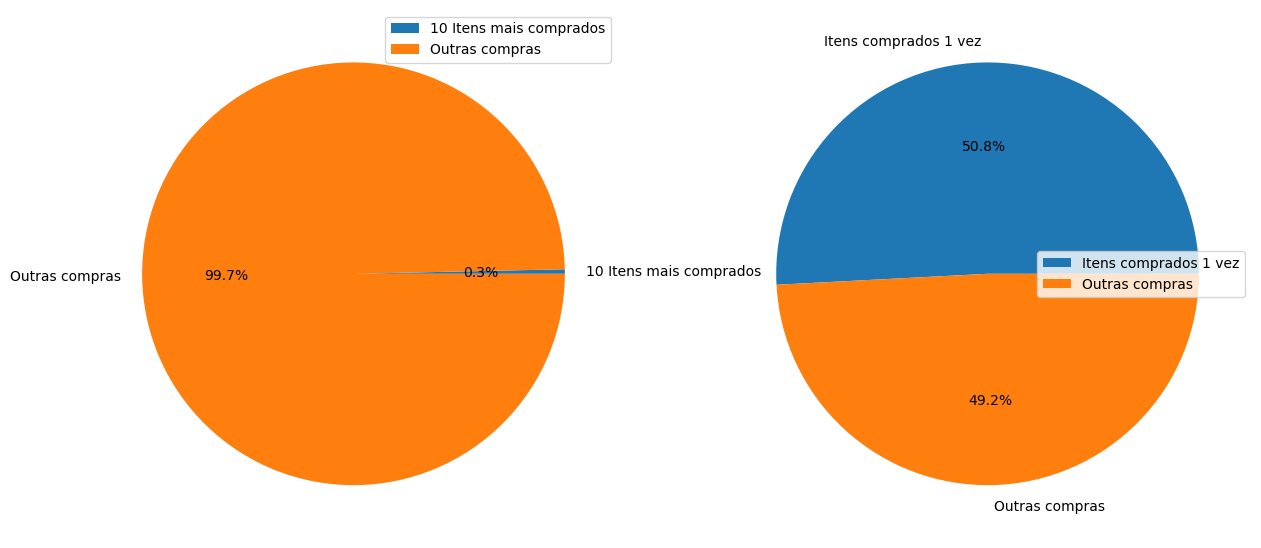

In [30]:
print("Quantidade total dos 10 itens mais recorrentes: ", dezitens_mais_comprados.Frequencia.agg(['sum']).iloc[0])

print("\nQuantidade total de compras unitárias: ", itens_comprados_1vez.Frequencia.agg(['sum']).iloc[0])

############################################## PLOTANDO GRÁFICO DE SETORES ##############################################
# Criando o subplot
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
dados = {'10 Itens mais comprados': soma.VL_TOTAL_HOMOLOGADO.iloc[0], 'Outras compras': restante.VL_TOTAL_HOMOLOGADO.iloc[0]}

plt.pie(dados.values(), labels=dados.keys(), autopct='%1.1f%%')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
dados = {'Itens comprados 1 vez': soma_compraunica.VL_TOTAL_HOMOLOGADO.iloc[0], 'Outras compras': restante_unitario.VL_TOTAL_HOMOLOGADO.iloc[0]}

plt.pie(dados.values(), labels=dados.keys(), autopct='%1.1f%%')
plt.legend(loc='right')
plt.show()

### Discussão

O valor total homologado das **10 compras mais recorrentes**, corresponde apenas a 0,3% do total, no período de 2016 a 2019, no estado do Rio Grande do Sul. Essa fração é de **6107947,00 reais**, enquanto que o restante equivale a cerca de **1,78 bilhão de reais**.

Por outro lado, quando olhamos para aquelas compras únicas, notamos que elas equivalem a **48% do total de compras**, ao passo que o montante gasto por elas equivale a **50,8%** do total, isto é, **908 milhão de reais**. Percebe-se abaixo que exemplos desses itens possuem longa durabilidade, o que justifica a frequência de compras.

Exemplos dessas compras são, dentre outras:
* COLAR CERVICAL RESGATE
* Tipos de pneus
* KIT MANGUEIRA INFERIOR
* AR CONDICIONADO SPLIT, 24.000 BTUS


## Análise dos Órgãos Públicos
***
As análises seguintes tem como foco identificar quais são os orgãos públicos que emitem mais licitações, além daqueles que realizam mais compras. Vamos observar seus comportamentos são semelhantes.

Para isso, utilizaremos as colunas **NM_ORGAO e VL_LICITACAOO** do dataframe **licitacoes_sem_outliers**.

Como a coluna NM_ORGAO é do tipo categórico, alguns tratamentos preliminares serão necessários. Isso será feito transformando todos os valores de texto dessa coluna para **CAIXA ALTA**, posteriormente as strings serão separadas pelo método **split** e tomaremos o primeiro elemento.
***

In [31]:
############################ Tratamento do dataframe licitacoes_sem_outliers ############################

licitacoes_por_orgao = licitacoes_sem_outliers[['NM_ORGAO','VL_LICITACAO']].reset_index(drop=True).copy()
orgao = []
for i in range(len(licitacoes_por_orgao)):
    licitacoes_por_orgao['NM_ORGAO'].iloc[i] = licitacoes_por_orgao['NM_ORGAO'].iloc[i].upper()
    
    orgao.append(licitacoes_por_orgao['NM_ORGAO'].iloc[i].split()[0])

# Cria uma nova coluna no dataframe contendo o primeiro elemento dos nomes dos órgãos públicos
licitacoes_por_orgao['ORGAO'] = orgao

# Agrupa o df pela coluna 'ORGAO', tomando a soma total e ordenando em ordem decrescente
licitacoes_por_orgao = licitacoes_por_orgao.groupby(by='ORGAO').sum().sort_values(by='VL_LICITACAO',ascending=False)

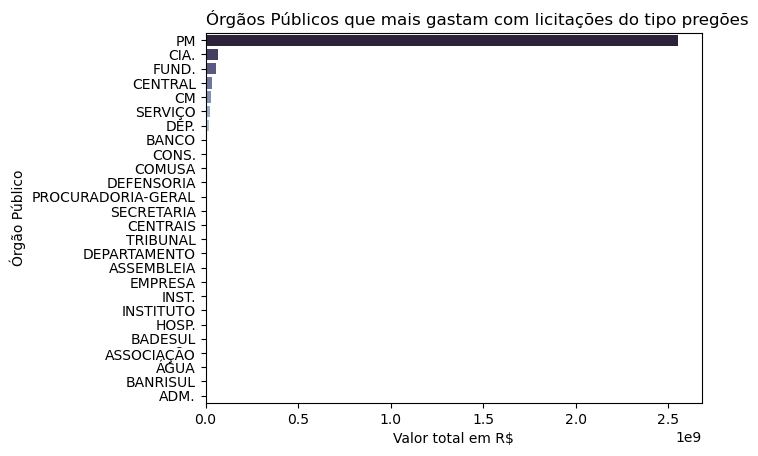

In [32]:
############################################# PLOTA GRÁFICO #############################################

# define paleta de cores
palette = sns.color_palette("ch:s=.25,rot=-.25",n_colors=8)
palette.reverse()

# Criar gráfico de barras
sns.barplot(data=licitacoes_por_orgao,y=licitacoes_por_orgao.index,x='VL_LICITACAO', orient='h', palette=palette)
plt.title("Órgãos Públicos que mais gastam com licitações do tipo pregões", loc='left', size=12)
plt.ylabel("Órgão Público")
plt.xlabel("Valor total em R$")
plt.show()

### Discussão
***
A partir do gráfico, observa-se que as **Prefeituras Municipais** representam os órgãos públicos que mais gastam dinheiro com licitações, seguido por Companhias (que envolvem cias de transporte coletivo, por exemplo), Fundações, pela Centrais de Licitações do Estado, e Câmaras Municipais.

Todavia, é possível notar que os valores gastos pelas prefeituras são bem superiores quando comparada aos outros órgãos.
***

# Análise de Concorrência
***
Com as analises já feitas em mãos, vamos estudar o impacto do tempo entre uma licitação ser aberta e sua homologação, sobre o valor da licitação. Sendo mais preciso, vamos comparar o **impacto da diferença entre as colunas DT_ABERTURA e DT_HOMOLOGACAO, sobre a coluna VL_LICITACAO.** 

A hipótese testada é se o aumento do prazo entre abertura e homologação faz com que o valor da licitação diminua. Para isso, continuaremos com as análises das modalidades **PRP e PRE**, e utilizando os dados tratados, isto é, que tiveram os *outliers* removidos.
***

In [33]:
# Agrupa as colunas VL_LICITACAO, DT_HOMOLOGACAO e DT_ABERTURA, em um único dataframe, analise_licitacoes
analise_licitacoes = licitacoes_sem_outliers[['VL_LICITACAO','DT_HOMOLOGACAO','DT_ABERTURA']].copy()

# As linhas abaixo envolvem operações para tratamento das colunas do tipo datetime
analise_licitacoes['DIFERENCA_DIAS'] = analise_licitacoes['DT_HOMOLOGACAO'] - analise_licitacoes['DT_ABERTURA']
analise_licitacoes= analise_licitacoes.astype({'DIFERENCA_DIAS': 'str'})
analise_licitacoes['DIFERENCA_DIAS'] = analise_licitacoes['DIFERENCA_DIAS'].str.split().str[0]
print(analise_licitacoes.query("DIFERENCA_DIAS=='NaT'"))
print("\n\n")
analise_licitacoes.info()

       VL_LICITACAO DT_HOMOLOGACAO DT_ABERTURA DIFERENCA_DIAS
40592      104142.6     2019-06-18         NaT            NaT



<class 'pandas.core.frame.DataFrame'>
Int64Index: 35416 entries, 0 to 40682
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   VL_LICITACAO    35416 non-null  float64       
 1   DT_HOMOLOGACAO  35416 non-null  datetime64[ns]
 2   DT_ABERTURA     35415 non-null  datetime64[ns]
 3   DIFERENCA_DIAS  35416 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 1.4+ MB


In [34]:
# Remoção da linha cujas colunas DT_ABERTURA e DIFERENCA DIAS  são iguais a NaT.
analise_licitacoes.drop(40592,inplace=True)
analise_licitacoes= analise_licitacoes.astype({'DIFERENCA_DIAS': 'int64'})
analise_licitacoes.describe()

,VL_LICITACAO,DIFERENCA_DIAS
count,35415.000000,35415.000000
mean,80320.773288,11.276013
std,95713.485200,22.691265
min,0.000000,0.000000
25%,13074.750000,1.000000
50%,40809.330000,5.000000
75%,112200.000000,13.000000
max,439500.000000,778.000000


In [35]:
data = analise_licitacoes.groupby(by='DIFERENCA_DIAS').sum().reset_index()
data = data.astype({'DIFERENCA_DIAS':'float64'})
data

,DIFERENCA_DIAS,VL_LICITACAO
0,0.0,5.518036e+08
1,1.0,2.681642e+08
2,2.0,1.199304e+08
3,3.0,1.393603e+08
4,4.0,1.362206e+08
...,...,...
225,744.0,3.050885e+05
226,750.0,1.316250e+05
227,751.0,1.813052e+05
228,765.0,3.753249e+05


***
Vamos testar a hipótese de que as variáveis **VL_LICITACAO e DIFERENCA_DIAS possuem uma relação linear** usando o modelo de regressão linear.

A **Regressão Linear** é usada para modelar a relação entre duas variáveis contínuas, onde uma variável é explicada (ou dependente) e a outra é explicativa (ou independente).

Para isso iremos utilizar o módulo **scikit-learn**.
***

In [36]:
from sklearn.linear_model import LinearRegression

# Define as duas variáveis
x = np.array(data['DIFERENCA_DIAS']).reshape(-1,1)
y = np.array(data['VL_LICITACAO'])

# Instancia o modelo de regressão linear
reg = LinearRegression().fit(x, y)

# Obtém a previsão da relação linear entre as variáveis
y_pred = reg.predict(x)

# Imprime os coeficientes do modelo
print("Coeficientes: ", reg.coef_)
print("Intercepto: ", reg.intercept_)


Coeficientes:  [-83398.43557256]
Intercepto:  24634837.65145746


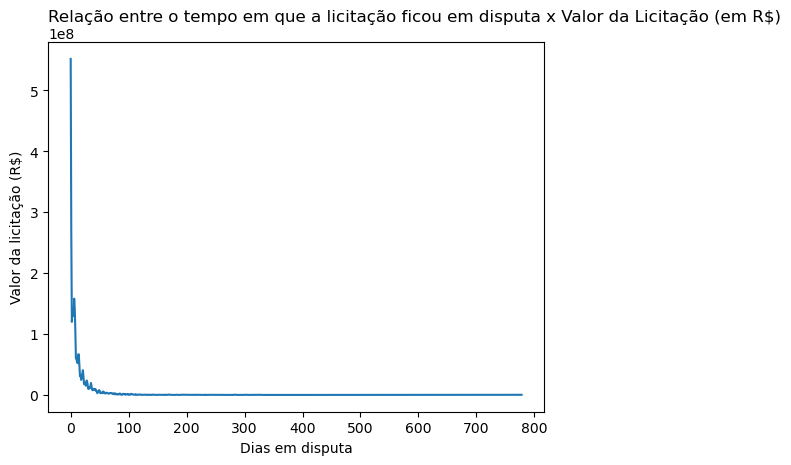

In [37]:
plt.plot(x,y)
plt.title("Relação entre o tempo em que a licitação ficou em disputa x Valor da Licitação (em R$)",pad=15, loc='left')
plt.ylabel("Valor da licitação (R$)",size=10)
plt.xlabel("Dias em disputa",size=10)
plt.show()

## Conclusões
***
A partir da análise da hipótese de que o valor da licitação e o número de dias em disputa seguem uma relação linear, concluímos que essa hipótese é **FALSA**. Isso pode ser observado através do gráfico acima.

Todavia, esse comportamento entre as duas variáveis ressalta o seguinte fato:
**Quanto maior o tempo em que a licitação fica em aberto, o seu valor tenderá a ser menor. Portanto, o gasto público será menor.** 

Uma possível justificativa para esse comportamento pode ser o fato de que, à medida que uma licitação permanece em disputa, **o número de empresas concorrentes será maior**. Como a maior parte das licitações são do tipo **MPR (Menor Preço)** e, provavelmente, mais empresas estarão à disposição, e o valor diminuirá.

Por fim, tal fato advém de análises preliminares e superficiais. Para que um resultado mais concreto e real seja obtido, é necessário análises mais profundas e complexas, que ficam como sugestões para trabalhos futuros.
***